# Running `Ellipse` with sigma-clipping

In this example, we execute the basic fitting demonstrated in the `Isophote-intro/isophote_example1.ipynb` notebook, with the main difference that the fit is performed with sigma-clipping.

We start again by loading the M51 galaxy image:

In [1]:
from astropy.io import fits
from astropy.utils.data import download_file

url = 'https://github.com/astropy/photutils-datasets/raw/master/data/isophote/M51.fits'
path = download_file(url)
hdu = fits.open(path)
data = hdu[0].data
hdu.close()

In [2]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data)

Sigma-clipping is implemented via parameters on the `fit_image` method. In this example, due to the significant contamination of the image by non-elliptical features, we apply quite aggressive clipping.

In [3]:
isolist = ellipse.fit_image(sclip=2., nclip=3)
isolist.to_table()

/Users/lbradley/.venvs/dev/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lbradley/.venvs/dev/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/lbradley/.venvs/dev/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lbradley/.venvs/dev/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/lbradley/.venvs/dev/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_err,grad_rerr,x0,x0_err,y0,y0_err,ndata,flag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int64,int64,int64,int64
0.0,7593.471777213892,0.0,0.0,0.0,0.0,0.0,0.0,None,None,256.8889145934686,0.0,257.9816331893624,0.0,1,0,0,0
0.5209868481924366,6873.2568508460845,21.590756901840866,0.04796827976256583,0.08480774536663847,138.57244505670636,53.626241976512254,-1651.075925918739,604.1015536590485,0.36588356972311675,256.8889145934686,0.023028964312117425,257.9816331893624,0.022972711420546896,13,0,11,0
0.5730855330116803,6787.106039017419,22.210184545232366,0.03791021996624773,0.08239662231161349,155.63056485170378,65.5859183595476,-1599.216505545672,586.4272217738851,0.3666965790687541,256.87867894592415,0.024529544342668443,257.99007226265616,0.024402719460114103,13,0,22,0
0.6303940863128483,6702.762951456815,24.827211962944272,0.0544077739719102,0.08155971861607077,138.24651822666297,45.61819145974352,-1617.8598821369237,575.7694135591095,0.3558833616657914,256.8683179943213,0.026912927623216044,257.98245455020935,0.026836493312156273,13,0,11,0
0.6934334949441332,6613.313323323301,26.76023945579615,0.06344467545076171,0.06125510158494914,151.65242975195008,29.51847153366179,-2091.585854807581,486.31144690480863,0.23250847952858605,256.84723179561,0.022524602879850957,257.9879974262119,0.022098927309539763,13,0,20,0
0.7627768444385465,6449.338947795572,13.032684919387753,0.06250769129758216,0.03890505675975175,143.75482980095694,21.95086629279614,-1603.2547468623695,271.0281105408289,0.1690486874099336,256.8416335861234,0.016567087849645327,257.9849664375579,0.016388067585451967,10,3,21,0
0.8390545288824012,6341.553620627647,11.826618836230148,0.056958958996837936,0.03243149958269432,146.97790627679984,18.34360450521529,-1730.7048222952246,253.20677808283637,0.14630269403597015,256.81579392365154,0.014344995085419645,257.9713417160712,0.014787941915161947,9,4,8,1
0.9229599817706413,6268.399042376598,23.030070342556666,0.10973318047781666,0.048145759975473816,147.73066122220445,13.302441181563504,-1755.1206014641743,343.39592677195316,0.19565374965428697,256.79841203167376,0.02337632375316625,257.965171407931,0.023443538772528145,12,1,10,0


Note how the added stability provided by sigma-clipping allows the fit to proceed further outwards before sensing a too low signal-to-noise condition.

## Plotting results

Similar to what we did before in the `isophote_example1.ipynb` notebook:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.origin'] = 'lower'
%matplotlib inline

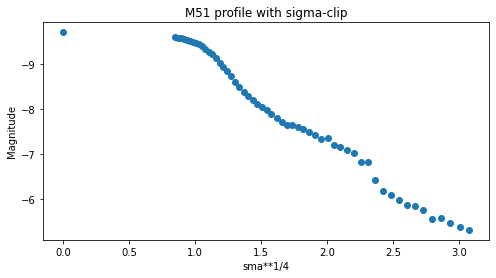

In [5]:
plt.figure(figsize=(8, 4))

plt.scatter(isolist.sma**0.25, -2.5*np.log10(isolist.intens))
plt.title("M51 profile with sigma-clip")
plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

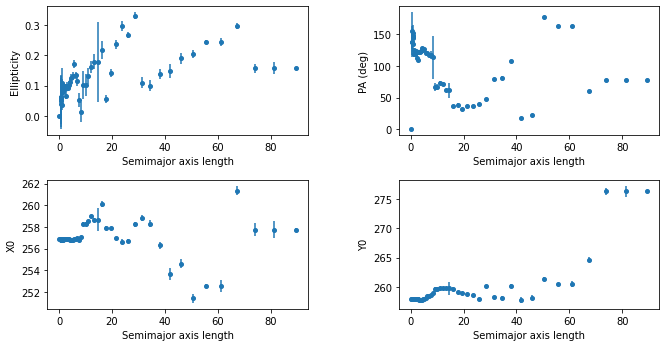

In [6]:
plt.figure(figsize=(10, 5))
plt.figure(1)

plt.subplot(221)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Ellipticity')

plt.subplot(222)
plt.errorbar(isolist.sma, isolist.pa/np.pi*180., yerr=isolist.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('PA (deg)')

plt.subplot(223)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('X0')

plt.subplot(224)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

Overplot a few isophotes on the image:

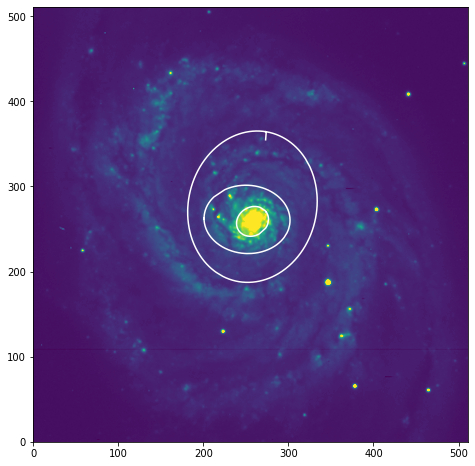

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(data, vmin=0, vmax=1000)
plt.axis([0, 511, 0, 511])

isos = []
smas = [20., 50., 90.]
for sma in smas:
    iso = isolist.get_closest(sma)
    isos.append(iso)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='white')

Brightness samples associated with the three isophotes above are plotted next. 

Note that the angles in the raw sample arrays are defined w.r.t the semimajor axis position angle. To plot everything in the same coordinate system, we have to offset each isophote's angles array by the corresponding position angle.  We then normalize the angles so that they are in the range between 0 and 360 degrees.

Text(0, 0.5, 'Intensity')

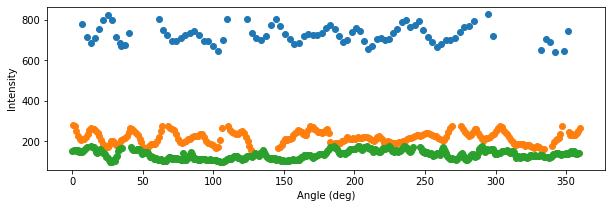

In [8]:
plt.figure(figsize=(10, 3))

for iso in isos:
    angles = ((iso.sample.values[0] + iso.sample.geometry.pa) / np.pi*180.) % 360.
    plt.scatter(angles, iso.sample.values[2])
    
plt.xlabel("Angle (deg)")
plt.ylabel("Intensity")

Parameters that measure deviations from a perfect ellipse can be plotted like this:

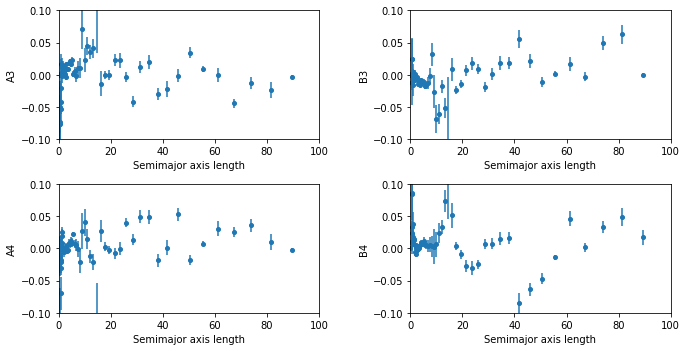

In [9]:
plt.figure(figsize=(10, 5))
plt.figure(1)
limits = [0., 100., -0.1, 0.1]

plt.subplot(221)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.a3, yerr=isolist.a3_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('A3')

plt.subplot(222)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.b3, yerr=isolist.b3_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('B3')

plt.subplot(223)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.a4, yerr=isolist.a4_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('A4')

plt.subplot(224)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.b4, fmt='o', yerr=isolist.b4_err, markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('B4')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)